In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_parquet("../data/processed/salinity_00_train_data.parquet")

In [20]:
print("🔍 Shape:", df.shape)
display(df.head())


🔍 Shape: (1903757, 8)


,lat,lon,depth,temperature_00,salinity_00,oxygen_00,nitrate_00,phosphate_00
171,-77.5,-176.5,0,-1.717,33.901,347.686,19.221,1.374
172,-77.5,-176.5,5,-1.719,33.900,345.000,19.616,1.389
173,-77.5,-176.5,10,-1.714,33.901,340.547,23.593,1.546
174,-77.5,-176.5,15,-1.710,33.902,342.179,22.772,1.472
175,-77.5,-176.5,20,-1.709,33.903,342.910,22.272,1.420


In [21]:
print("\nTypy kolumn:")
print(df.dtypes)

print("\nBraki danych (NaN):")
print(df.isna().sum())


Typy kolumn:
lat               float64
lon               float64
depth               int32
temperature_00    float64
salinity_00       float64
oxygen_00         float64
nitrate_00        float64
phosphate_00      float64
dtype: object

Braki danych (NaN):
lat                     0
lon                     0
depth                   0
temperature_00       7812
salinity_00             0
oxygen_00          400560
nitrate_00        1251748
phosphate_00      1054401
dtype: int64


In [22]:
display(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
lat,1903757.0,-10.351160,39.806441,-77.500,-44.500,-15.500,18.500,89.500
lon,1903757.0,-12.325001,110.043808,-179.500,-114.500,-21.500,82.500,179.500
depth,1903757.0,448.687684,454.841721,0.000,65.000,275.000,750.000,1500.000
temperature_00,1895945.0,9.760951,8.463042,-2.149,3.205,6.987,15.167,30.703
salinity_00,1903757.0,34.708550,1.038397,2.848,34.354,34.633,35.021,39.405
oxygen_00,1503197.0,202.588722,80.877629,0.000,174.417,207.423,254.781,452.891
nitrate_00,652009.0,17.294391,13.579708,-0.082,3.639,15.998,29.988,49.980
phosphate_00,849356.0,1.287423,0.921105,0.000,0.431,1.158,2.092,11.589


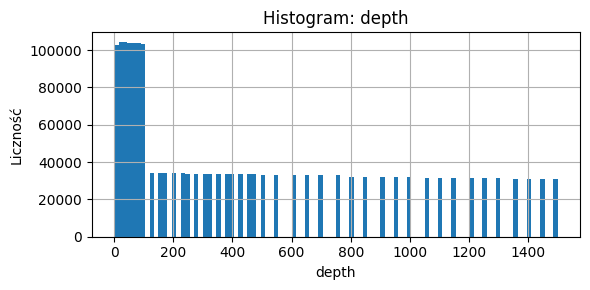

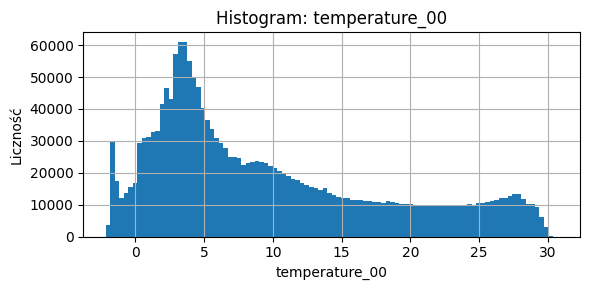

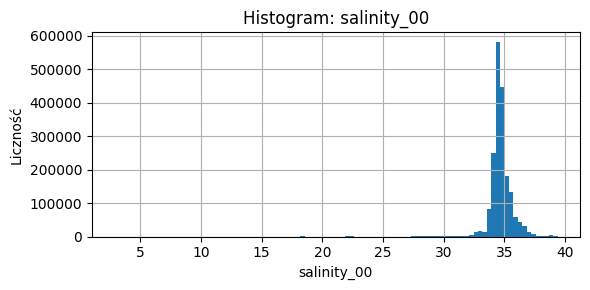

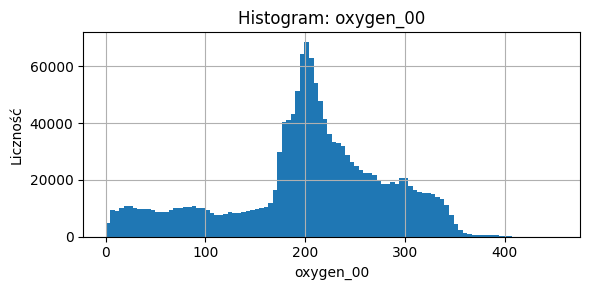

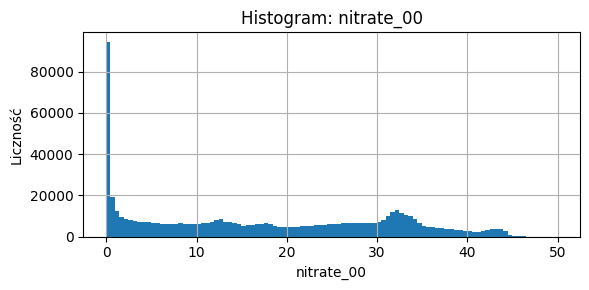

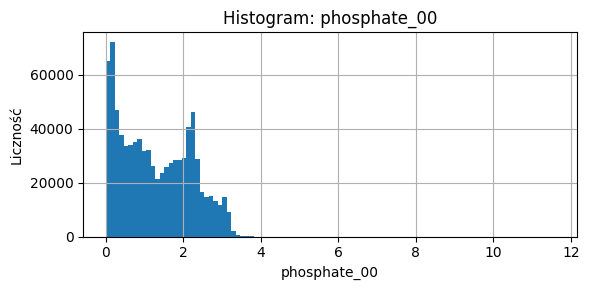

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    if col in ['lat', 'lon']: continue
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=100)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

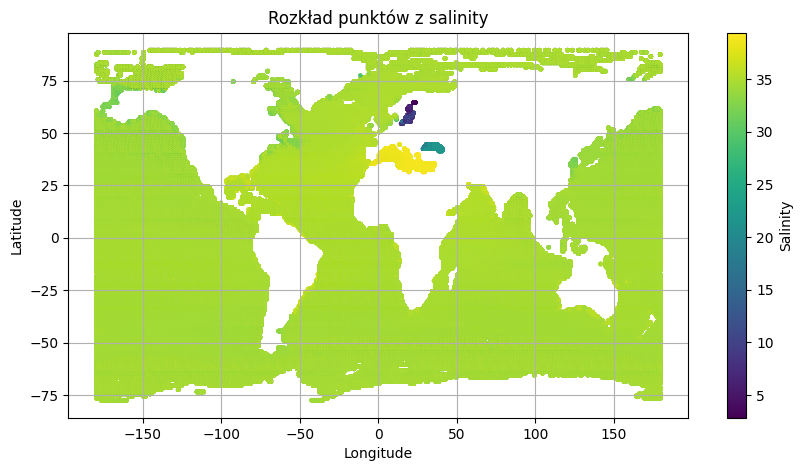

In [ ]:
plt.figure(figsize=(10, 5))
subset = df.dropna(subset=["lat", "lon", "salinity_00"])
sc = plt.scatter(subset["lon"], subset["lat"], c=subset["salinity_00"], cmap="viridis", s=5)
plt.colorbar(sc, label="Salinity")
plt.title("Rozkład punktów z salinity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

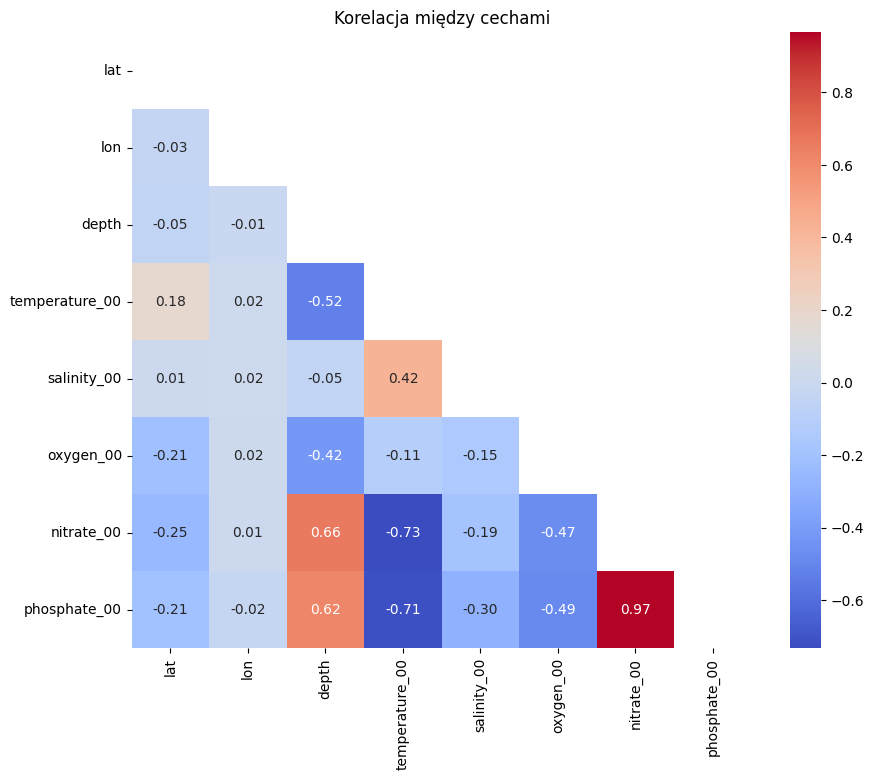

In [25]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
plt.title("Korelacja między cechami")
plt.show()

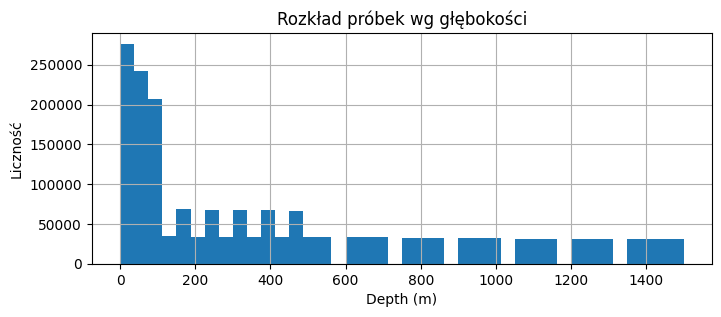

In [26]:
if "depth" in df.columns:
    plt.figure(figsize=(8, 3))
    df["depth"].hist(bins=40)
    plt.title("Rozkład próbek wg głębokości")
    plt.xlabel("Depth (m)")
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.show()